In [21]:
import networkx as nx
import os
import glob
import matplotlib.pyplot as plt
import pandas as pd
from linkmethods import get_forward_links, filterbacklinks, get_links, get_views

In [22]:
article = 'Meisen'

In [23]:
path = r'datafiles/' + article + '/backlinksdata'
extension = 'csv'
result = glob.glob('*.{}'.format(extension))
cropped_result = [r[0:-4] for r in result]
print(cropped_result)

['Aegithalos', 'Alter Friedhof (Gießen)', 'Amsel', 'Apodaca Provincial Park', 'Appetenzverhalten', 'Arten des Anhangs I der Vogelschutzrichtlinie der EU', 'Bartkauz', 'Bartmeise', 'Baumhopfe', 'Bergkohlmeise', 'Beth Slikas', 'Beutelmeisen', 'Blaumeise', 'Blochinger Sandwinkel', 'Borodino-Buntmeise', 'Braunbürzelspecht', 'Brauner Bär (Schmetterling)', 'Buchsbaumzünsler', 'Buntmeise', 'Buntspecht', 'Burckhardtshöhe', 'Bylerward', 'Chibinen', 'Christopher M. Perrins', 'Cyanistes', 'Deutschland', 'Dommelspecht', 'Dunenspecht', 'Es rappelt im Karton', 'Europa- und Naturschutzgebiet Gerzkopf', 'Federsee', 'Fichtenmeise', 'Geographie der Vereinigten Staaten', 'Geographie Deutschlands', 'Gleispark Frintrop', 'Goldhähnchen-Laubsänger', 'Gordon Bay Provincial Park', 'Groß Zicker', 'Grüner Tropfenastrild', 'Gutshaus Friedenfelde', 'Handbook of the Birds of the World', 'Handschwinge', 'Hanko-Halbinsel', 'Hans Löhrl', 'Hartenstein (Mittelfranken)', 'Haubenmeise', 'Haussperling', 'Hellwinkel', 'Henr


Ist möglich mit allen forward links, dann aber abscheiden nach 250 oder weniger, dann pageview anzahlen von allen forward links berechnen und alle absteigend sortieren, dann Dataframe abcutten und nur die besten nehmen.

In [30]:
flinks = []
for entry in cropped_result:
    flinks.append(filterbacklinks(get_links(entry,"links")))

In [31]:
tuples = []
for entry in flinks:
    for e in entry[0:5]:
        print(entry)
        if(entry[0] == e):
            pass
        else:
            tuples.append((entry[0],e))

['Afghanistan', 'Beutelmeisen', 'Brauenschwanzmeise', 'Burmaschwanzmeise', 'China', 'Endemit', 'Familie (Biologie)', 'Gattung (Biologie)', 'Himalaya', 'Indochina', 'Johann Hermann (Naturforscher)', 'Kaschmir', 'Kurt Bauer (Ornithologe)', 'Meisen', 'Myanmar', 'Nomenklatur (Biologie)', 'Ordnung (Biologie)', 'Passerida', 'Rostwangen-Schwanzmeise', 'Rußschwanzmeise', 'Schwanzmeise', 'Schwanzmeisen', 'Schwarzkehl-Schwanzmeise', 'Silberkehl-Schwanzmeise', 'Singvögel', 'Sperlingsvögel', 'Superspecies', 'Sylvioidea', 'Systematik (Biologie)', 'Untergattung', 'Weißkehl-Schwanzmeise', 'Weißwangen-Schwanzmeise']
['Afghanistan', 'Beutelmeisen', 'Brauenschwanzmeise', 'Burmaschwanzmeise', 'China', 'Endemit', 'Familie (Biologie)', 'Gattung (Biologie)', 'Himalaya', 'Indochina', 'Johann Hermann (Naturforscher)', 'Kaschmir', 'Kurt Bauer (Ornithologe)', 'Meisen', 'Myanmar', 'Nomenklatur (Biologie)', 'Ordnung (Biologie)', 'Passerida', 'Rostwangen-Schwanzmeise', 'Rußschwanzmeise', 'Schwanzmeise', 'Schwanzme

In [32]:
wewio = ['(8773) Torquilla', 'Adriatisches Meer', 'Akazien', 'Alaska', 'Ameisen', 'Art (Biologie)', 'Asteroid', 'Aula-Verlag (Wiebelsheim)', 'Ausführliches Lexikon der griechischen und römischen Mythologie', 'Balearen', 'Balz', 'Bekassine', 'Biozid', 'Birkhuhn', 'Blattläuse', 'Blutspecht', 'Bosporus', 'Braunkehlchen', 'Breitfrontzug', 'Brutparasitismus', 'Buchen', 'Buntspecht', 'Carl von Linné', 'Charles Rothschild', 'Charles Vaurie', 'David A. Christie', 'David Nurney', 'Demokratische Republik Kongo', 'Dohle', 'Douglasie', 'Drosseln', 'Eisvogel', 'Epitheton', 'Etymologisches Wörterbuch der deutschen Sprache', 'Familie (Biologie)', 'Feldlerche', 'Fennoskandien', 'Fliegenschnäpper', 'Flussregenpfeifer', 'Frankreich', 'Gambia', 'Gartenrotschwanz', 'Gattung (Biologie)', 'Gelbe Wiesenameise', 'Gemeinsame Normdatei', 'Goldammer', 'Goldregenpfeifer', 'Großer Brachvogel', 'Grünspecht', 'Habicht', 'Handbuch der Vögel Mitteleuropas', 'Hans Winkler (Ornithologe)', 'Haubentaucher', 'Haussperling', 'Hera', 'Himachal Pradesh', 'Himalaya', 'Hokkaido', 'Höhlenbrüter', 'IUCN', 'Iberische Halbinsel', 'Internet Bird Collection', 'Io (Mythologie)', 'Isabellfarbe', 'Italien', 'Iynx (Mythologie)', 'Iynx (magisches Objekt)', 'Jochen Hölzinger', 'Johannes Minckwitz (Schriftsteller)', 'Juno (Mythologie)', 'Jupiter (Mythologie)', 'Kahlschlag', 'Kalabrien', 'Kamerun', 'Kaukasus', 'Kiebitz (Art)', 'Kiefern', 'Klasse (Biologie)', 'Kleiber (Art)', 'Kormoran (Art)', 'Korsika', 'Kranich', 'Kuckuck', 'Kurzstreckenzieher', 'Langstreckenzieher', 'Lappland', 'Maghreb', 'Mauersegler', 'Mehlschwalbe', 'Meisen', 'Mimikry', 'NASA', 'Nachtigall', 'Nachtschwalben', 'Neuntöter', 'Nomenklatur (Biologie)', 'Nominotypisches Taxon', 'Nordkorea', 'Nordsee', 'Nordwestafrika', 'Opportunismus', 'Ordnung (Biologie)', 'Otto Kleinschmidt', 'Pakistan', 'Pazifischer Ozean', 'Peter Berthold', 'Pirol', 'Rasenameise', 'Rauchschwalbe', 'Rebhuhn', 'Richard Engelmann (Archäologe)', 'Rosa Luxemburg', 'Rote Liste gefährdeter Arten', 'Rote Waldameise', 'Rotkehl-Wendehals', 'Rotkehlchen', 'Rotmilan', 'Saatkrähe', 'Sachalin', 'Sahara', 'Sardinien', 'Savanne', 'Schachtelbrut', 'Schleiereule', 'Schottland', 'Schwarzes Meer', 'Schwarzspecht', 'Senegal', 'Sichuan', 'Sierra Leone', 'Sinai-Halbinsel', 'Singdrossel', 'Spechte', 'Spechtvögel', 'Speiballen', 'Standvogel', 'Star (Art)', 'Steinkauz', 'Stieglitz', 'Sumpfrohrsänger', 'Systematik (Biologie)', 'Südostasien', 'Tarnung (Biologie)', 'Taubenvögel', 'Teichrohrsänger', 'Trivialnamen', 'Turmfalke', 'Turteltaube', 'Uferschwalbe', 'Uhu', 'Urs N. Glutz von Blotzheim', 'Vogel des Jahres (Deutschland)', 'Vogel des Jahres (Schweiz)', 'Vögel', 'Waldameisen', 'Waldkauz', 'Waldohreule', 'Wanderfalke', 'Wasseramsel', 'Wegameisen', 'Weißstorch', 'Wendehals (DDR)', 'Wendehälse', 'Werner Böhm', 'Wiedehopf', 'Wilhelm Binder (Philologe)', 'Wilhelm Heinrich Roscher', 'Zaunkönig', 'Zeus', 'Ziegenmelker', 'Zugvogel', 'Äthiopien']
print(wewio[0:5])

['(8773) Torquilla', 'Adriatisches Meer', 'Akazien', 'Alaska', 'Ameisen']


In [33]:
frame = pd.DataFrame(tuples)
frame

0                       1
0        Afghanistan            Beutelmeisen
1        Afghanistan      Brauenschwanzmeise
2        Afghanistan       Burmaschwanzmeise
3        Afghanistan                   China
4    14. Jahrhundert         19. Jahrhundert
..               ...                     ...
634         Algerien  Avifauna Mitteleuropas
635             Brut                Drosseln
636             Brut              Entenvögel
637             Brut              Greifvogel
638             Brut         Konkurrenzdruck

[639 rows x 2 columns]

In [34]:
G = nx.Graph()
G.add_nodes_from(cropped_result)
flinkroutingp = []
for i in enumerate(flinks):
    flinkroutingp.append(i[1][0])
    G.add_node(i[1][0])
G.add_node(article)

In [35]:
G.add_edges_from([(r,article) for r in cropped_result])
G.add_edges_from([(r) for r in tuples])

In [42]:
plt.rcParams["figure.figsize"] = (25,20)
nx.draw(G, with_labels=True, font_size=1, pos=nx.circular_layout(G,k=0.15,iteratopns=20))
plt.show()

TypeError: circular_layout() got an unexpected keyword argument 'k'

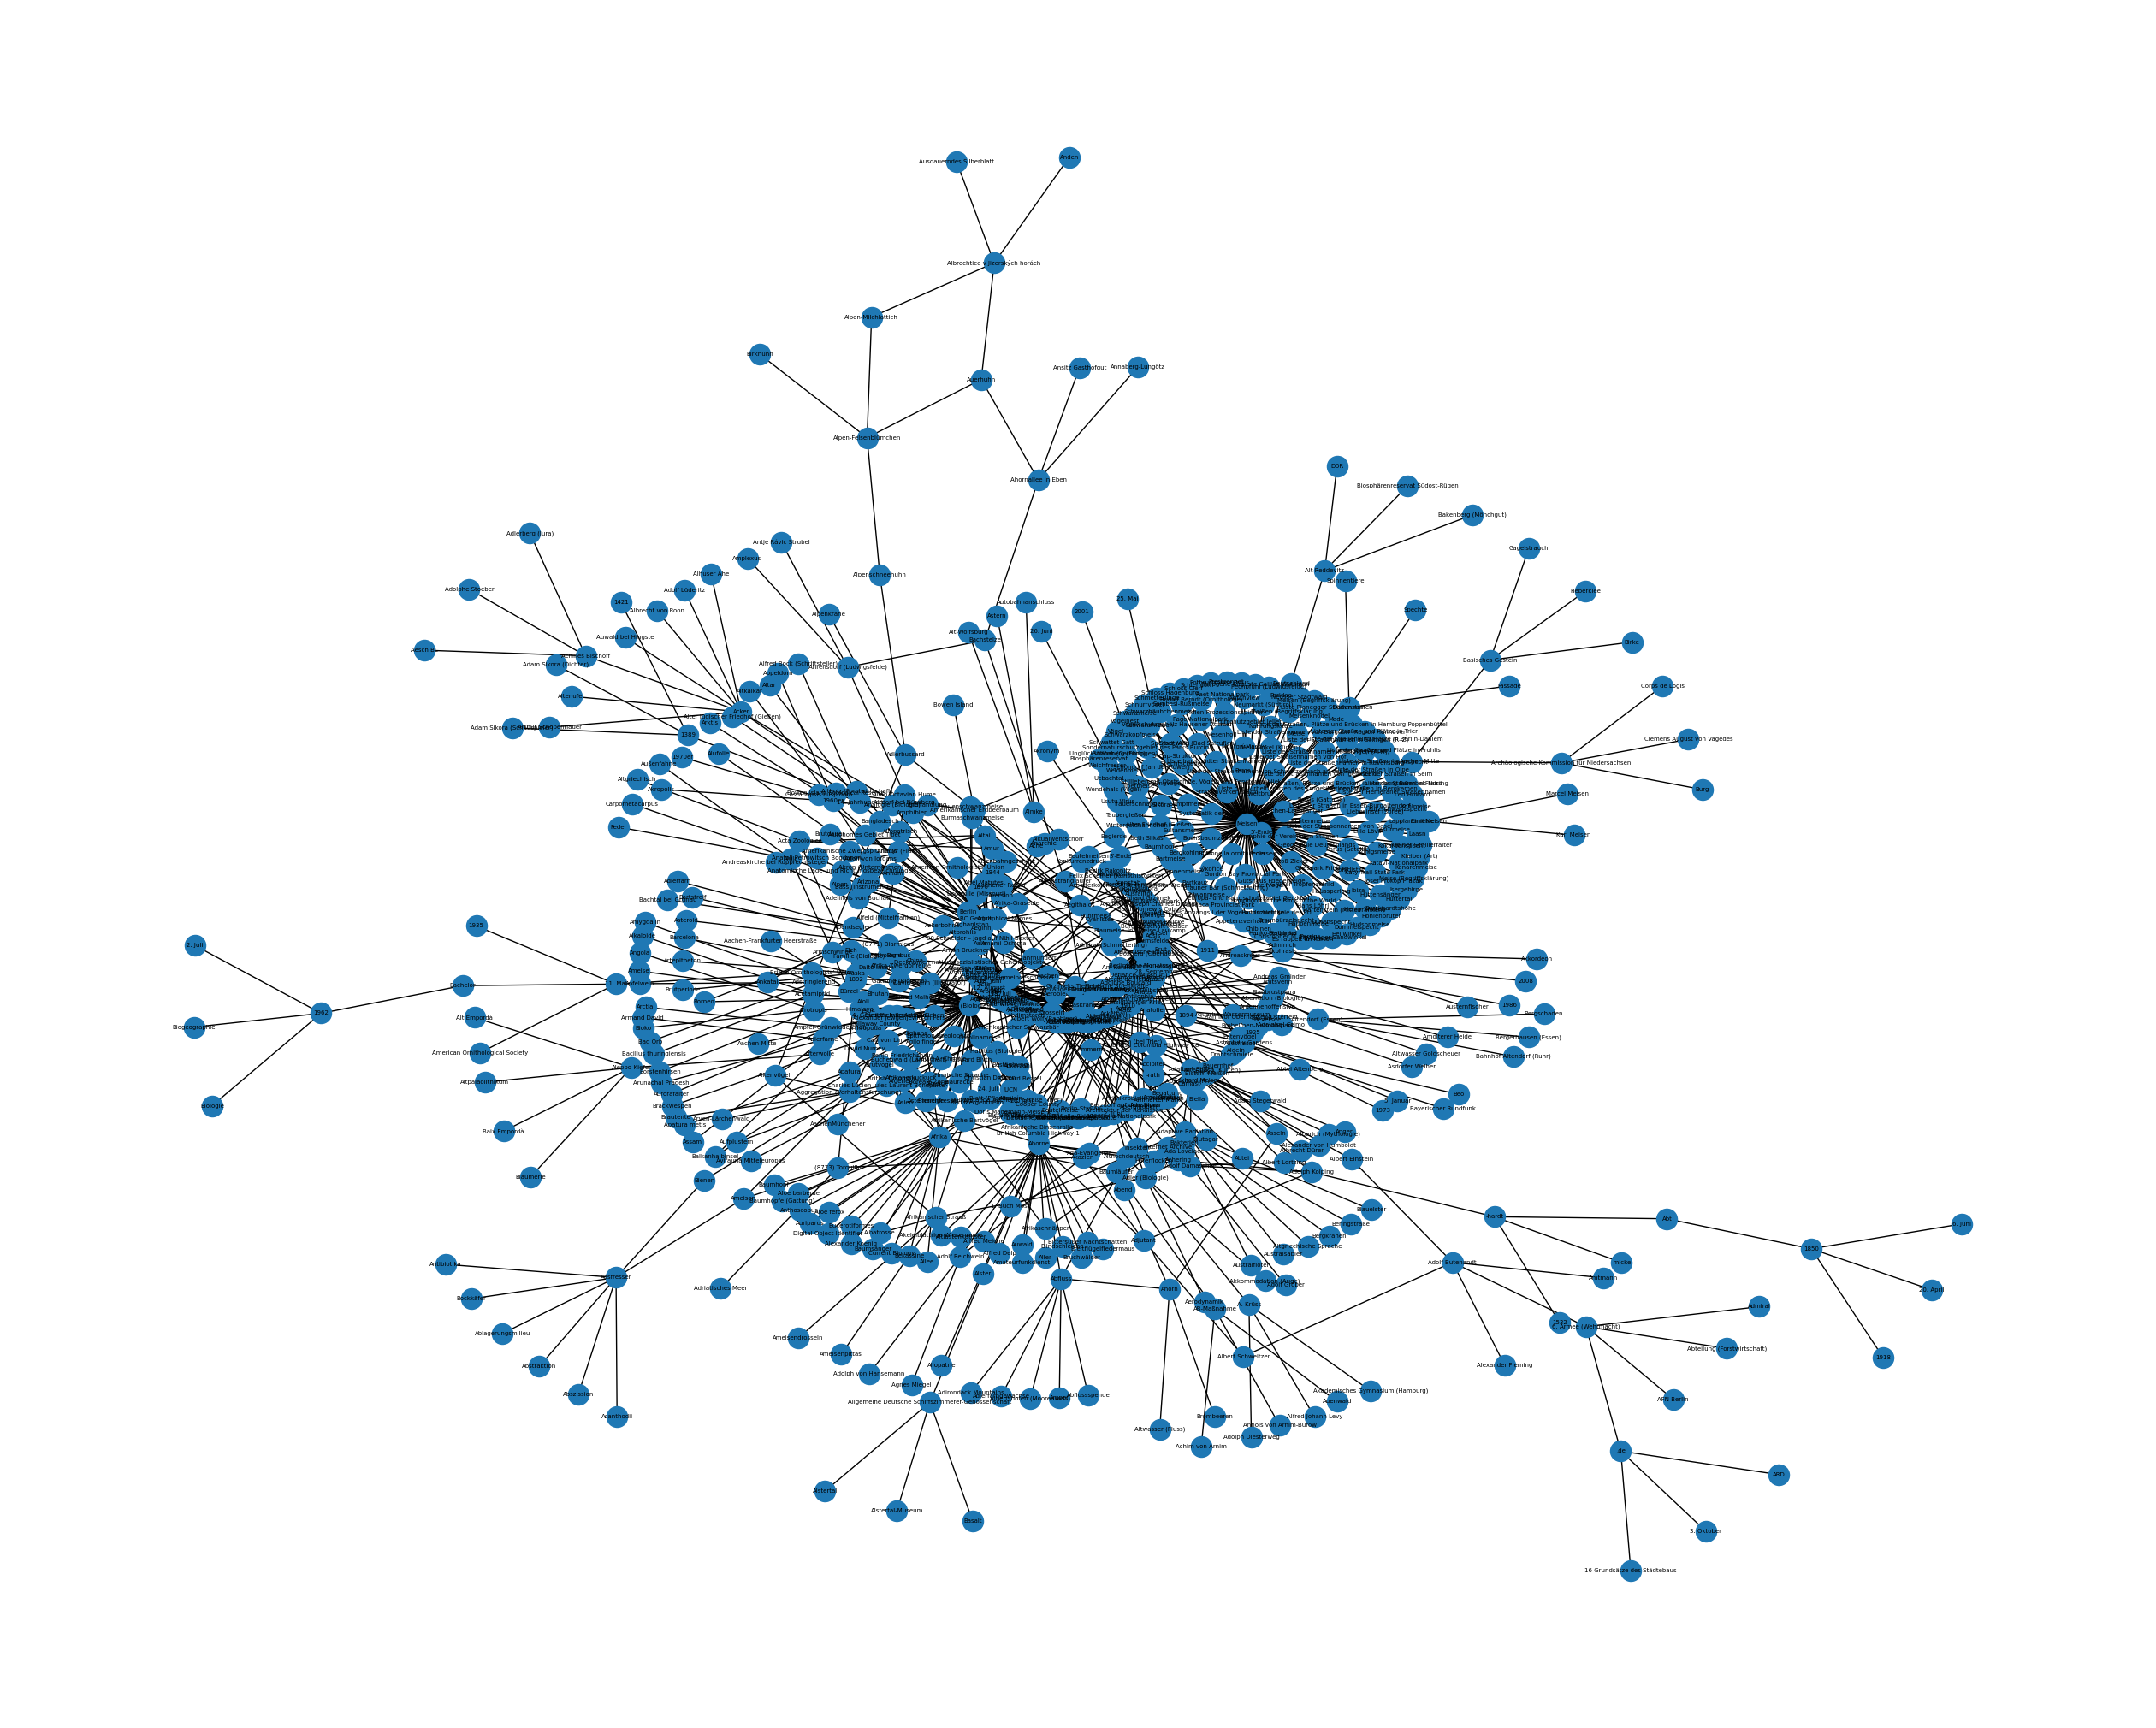

In [41]:
nx.draw(G, with_labels=True, font_size=5, pos=nx.kamada_kawai_layout(G))
plt.show()

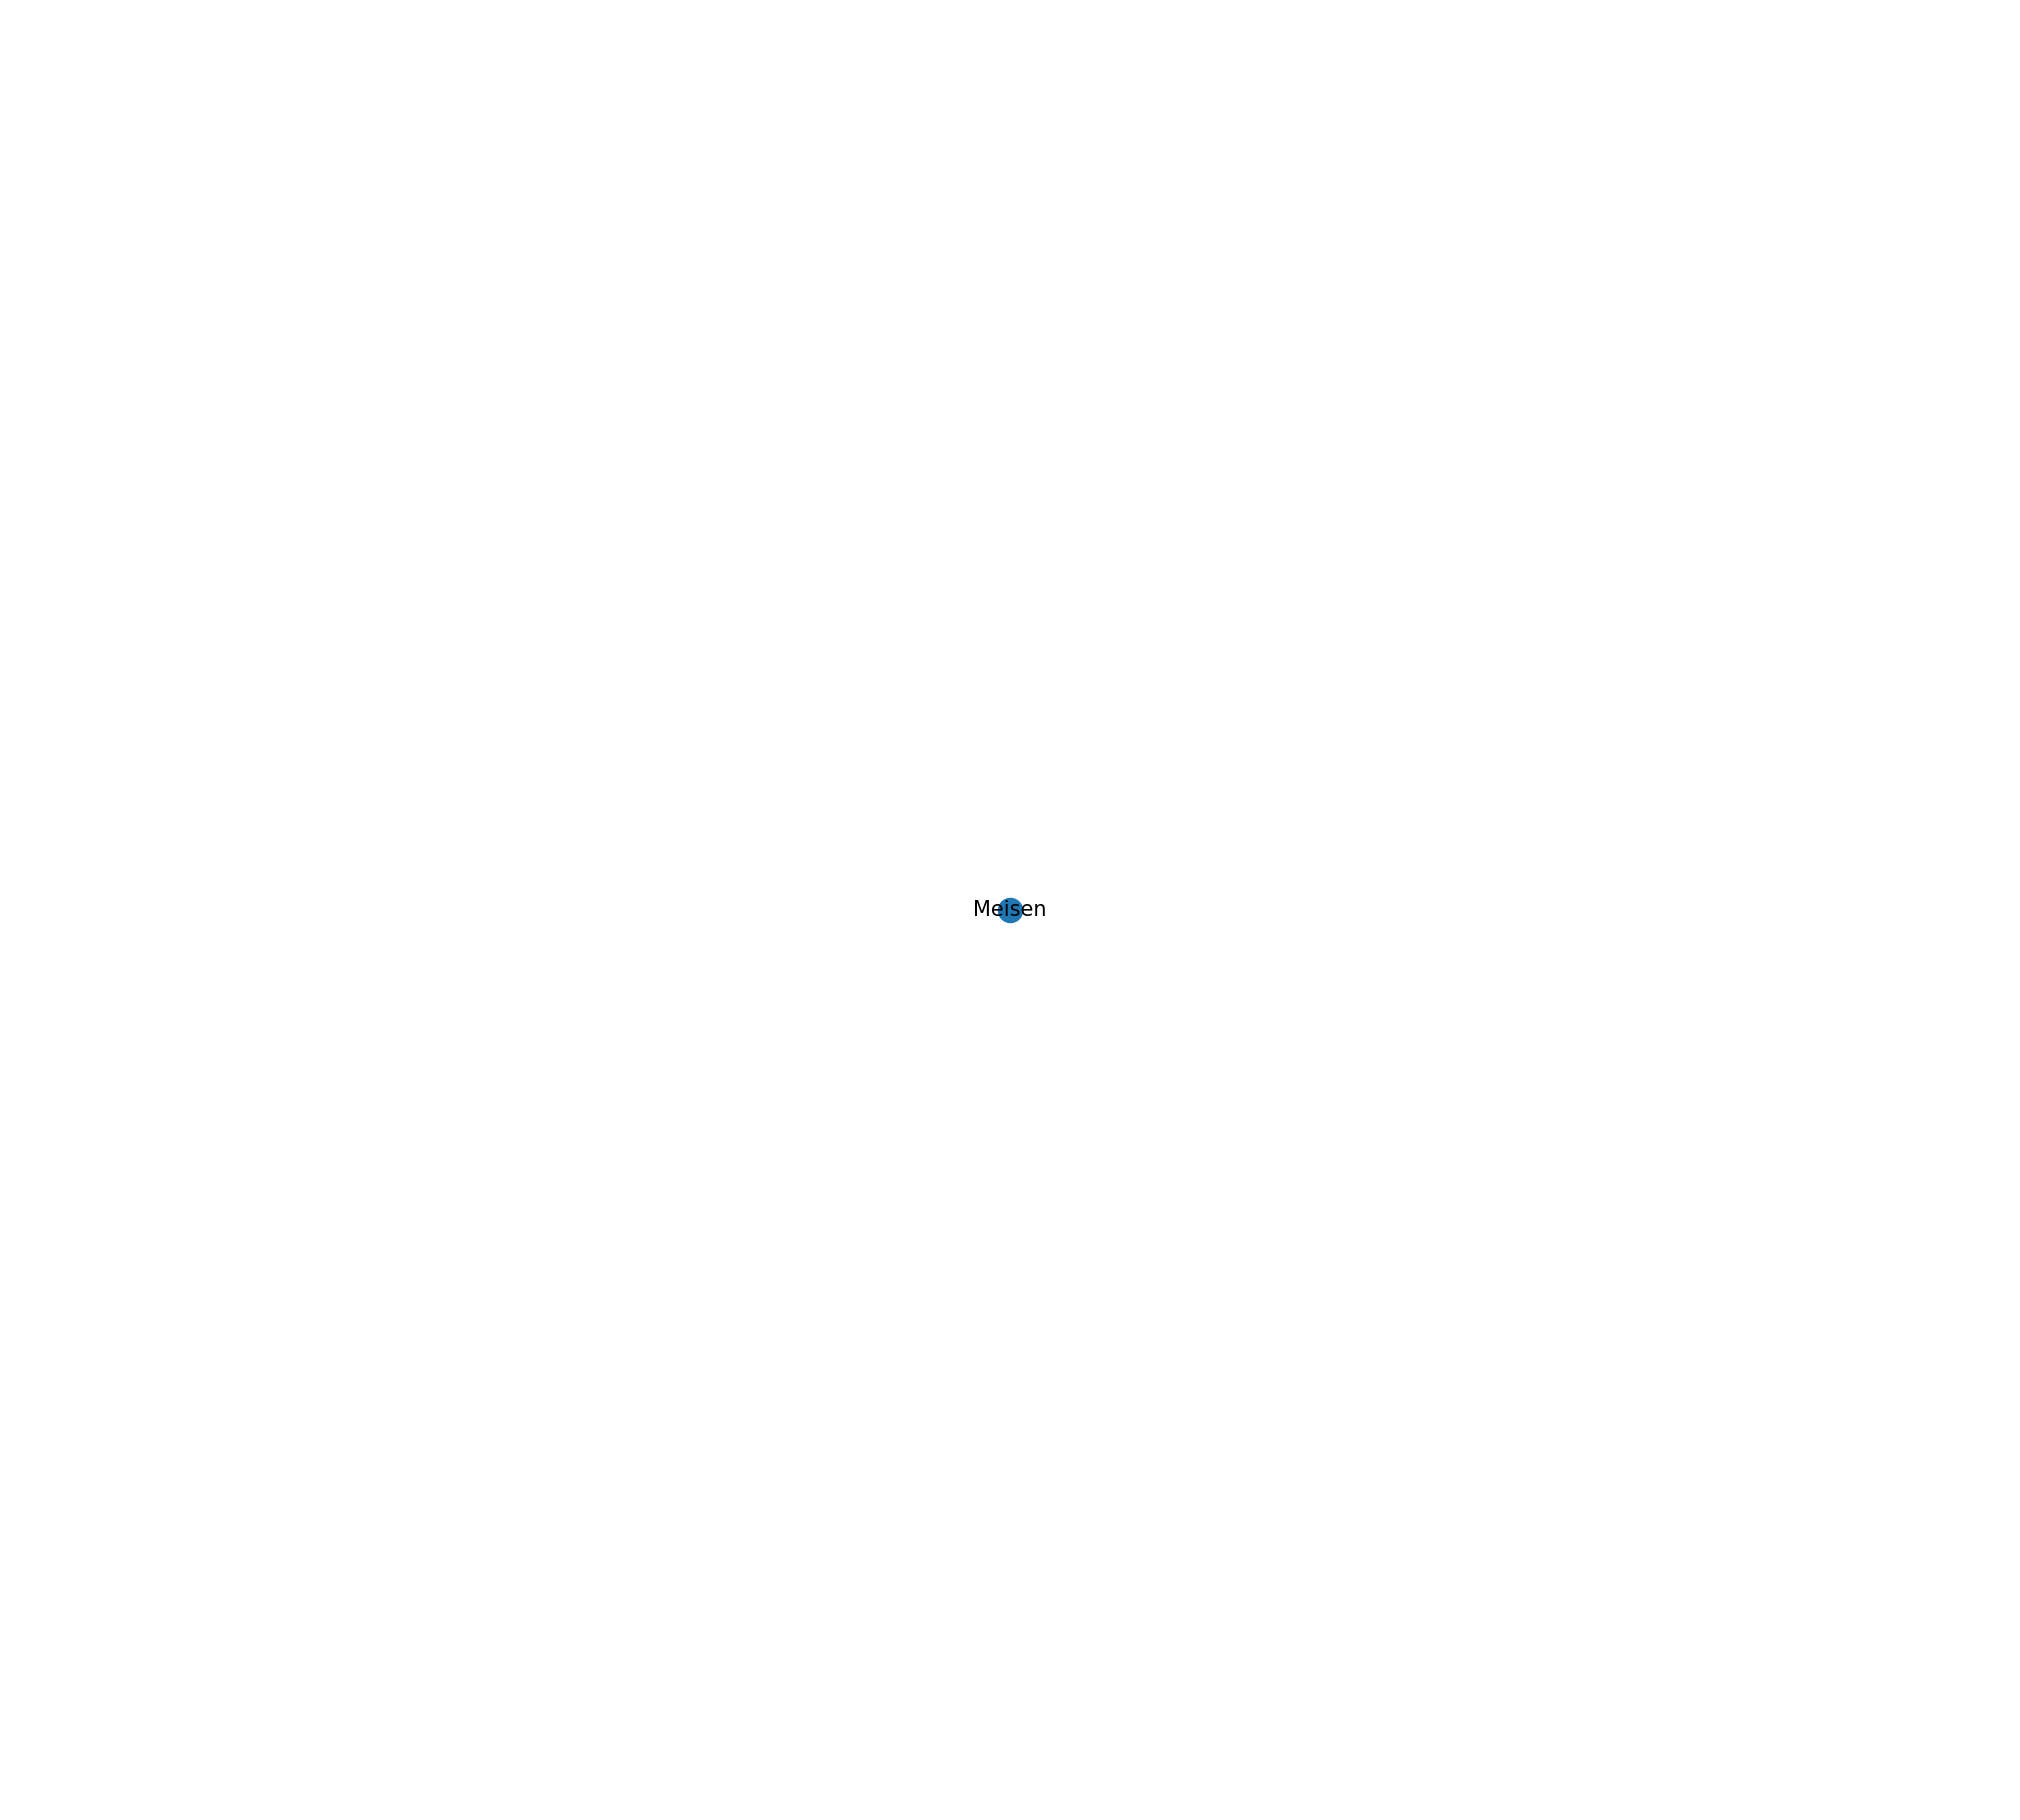

In [11]:
nx.draw(G, with_labels=True, font_size=15, pos=nx.fruchterman_reingold_layout(G))
plt.show()

In [85]:
from linkmethods import get_target, get_backlink_views
import numpy as np

In [102]:
mean_views = list(np.array(get_backlink_views("Meisen", get_target("Meisen"))).mean(axis=1))

In [103]:
len(cropped_result)

162

In [115]:
source = [i for i in range(len(cropped_result))]
target = [len(source)]*len(source)
value = mean_views
print(np.shape(source))
print(source)
print(np.shape(target))
print(target)
print(np.shape(value))
print(value)

(162,)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161]
(162,)
[162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162, 162,

In [96]:
import plotly.graph_objects as go

In [121]:
link = dict(source=source, target= target, value= value)
data = go.Sankey(link=link)
#fig = go.Figure(data)
fig = go.Figure(data=[go.Sankey(
    node= dict(
        pad = 15,
        thickness=15,
        label=cropped_result
    ),
    link= dict(
        source=source,
        target=target,
        value=value
    )
)])
fig.update_layout(title_text="", font_size=10, width=2000, height=2000)
fig.show()

In [124]:
fig.write_html(r"C:\Users\Marvin\Desktop\sankey.html")